In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import sys
import visual_search_rsa
import itertools

UTILS_DIR = 'FC_geodesic/utils/distance_FC'
sys.path.insert(0, UTILS_DIR)
from distance_FC import distance_FC

### Simulate a plausible scanpath. 

In [ ]:
## Set parameters. 
n_simulations = 10 # number of simulations
sig = 2000         # fixation noise 
jump = 10          # jump interval
n_steps = 100      # number of timesteps 

sim_matrices = []

for s in np.arange(n_simulations): 

    ## Make synthetic data.
    x, y = np.arange(0,8192)+1, np.arange(0,4096)+1
    gaze = np.ones((n_steps, 2))*np.nan
    # Choose starting location. 
    x_current, y_current = random.choice(x), random.choice(y)  

    for t in np.arange(n_steps): 

        if np.mod(t,jump)==0: 
            # Jump to new location.
            [x_current, y_current] = [random.choice(x), random.choice(y)]
        else: 
            # Fixate at current location. 
            [x_current, y_current] = np.round(np.random.multivariate_normal([x_current, y_current],[[sig, 0], [0, sig]]))

        gaze[t,:] = x_current, y_current

    time_sim = cosine_similarity(gaze, dense_output=True)
    sim_matrices.append(time_sim)

    fig, ax = plt.subplots(1, 3, figsize=(16,4))
    ax[0].plot(gaze[:,0], gaze[:,1])
    ax[0].set_xlim(0,8192)
    ax[0].set_ylim(0,4096)
    ax[1].imshow(time_sim, cmap='YlGnBu')
    ax[1].set_xticks(np.arange(0,n_steps, 10))
    ax[1].set_yticks(np.arange(0,n_steps, 10))
    p = np.random.permutation(n_steps)
    time_sim_permuted = sim_matrices[0][p,:][:,p]
    ax[2].imshow(time_sim_permuted, cmap='YlGnBu')
    ax[2].set_xticks(np.arange(0,n_steps, 10))
    ax[2].set_yticks(np.arange(0,n_steps, 10))
    plt.show();

### Significance testing. 
Reference on pearson & geodesic distance comparison: https://www.sciencedirect.com/science/article/pii/S1053811919309899

#### Null distribution for distance to one matrix.
Are two matrices more similar than we expect by chance? 

In [ ]:
# Null.
null_distribution = visual_search_rsa.compute_null(sim_matrices[0], 1000)

# Actual. 
dist = distance_FC(sim_matrices[0], sim_matrices[1])
d_geodesic = dist.geodesic()
d_pearson = dist.pearson()

fig = plt.figure()
fig.set_size_inches(8,4)
plt.hist(null_distribution)
plt.axvline(x=d_geodesic, color='red');

#### Null distribution for average distance between several matrices.
Are multiple matrices more similar to each other than we expect by chance?  

In [ ]:
# Null.
average_null = visual_search_rsa.compute_average_null(sim_matrices, 20)
# Actual. 
average_dist = visual_search_rsa.compute_average(sim_matrices)

fig = plt.figure()
fig.set_size_inches(8,4)
plt.hist(average_null)
plt.axvline(x=average_dist, color='green');

### Simulate plausible scanpaths in different contexts. 

simulation: 0


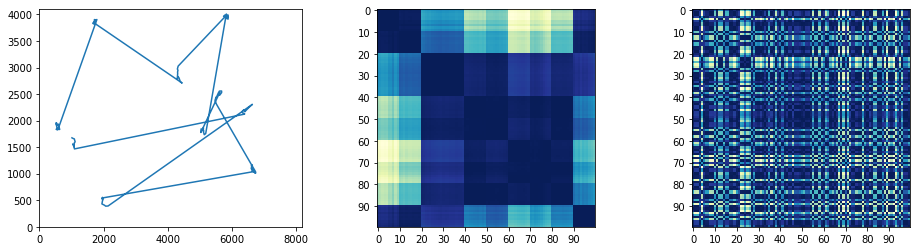

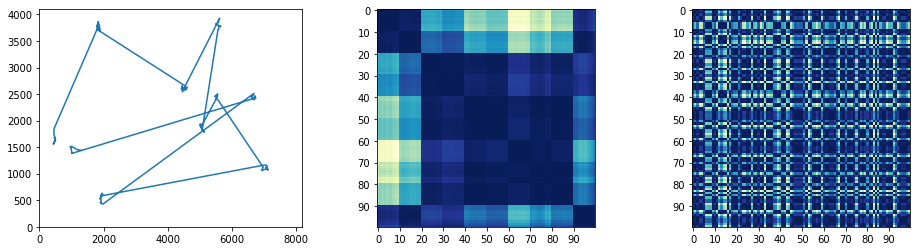

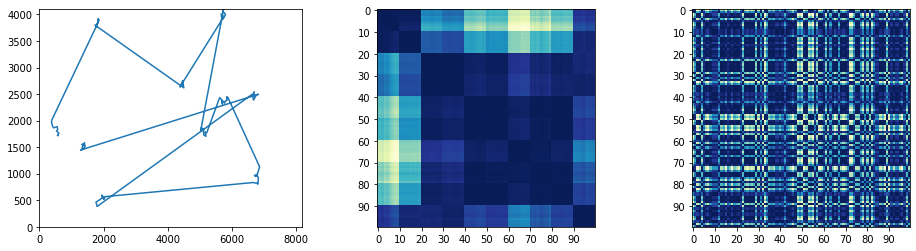

simulation: 3


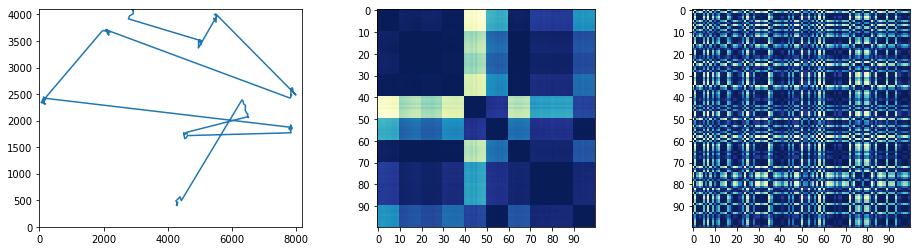

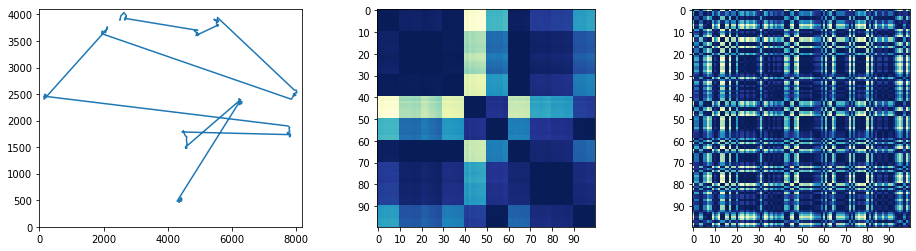

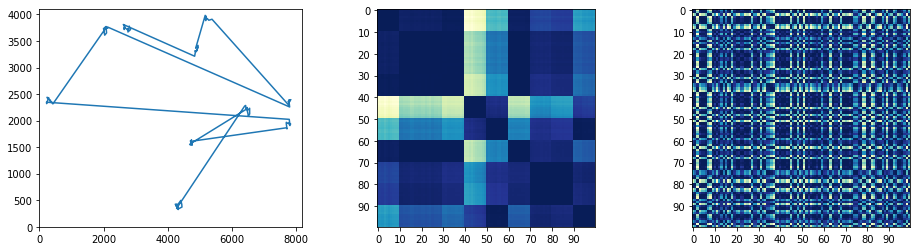

simulation: 6


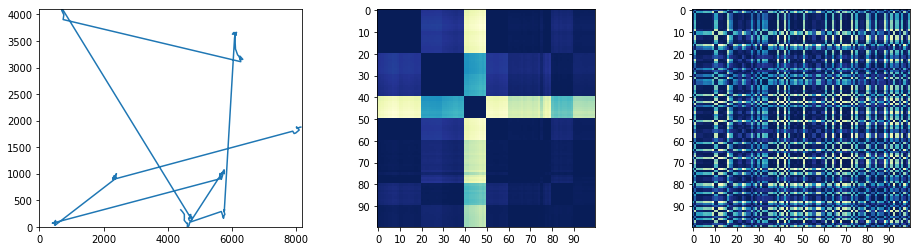

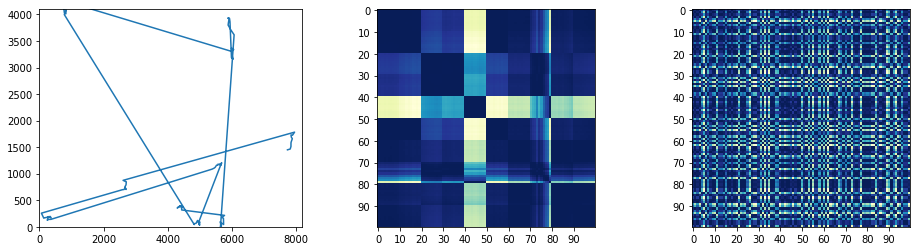

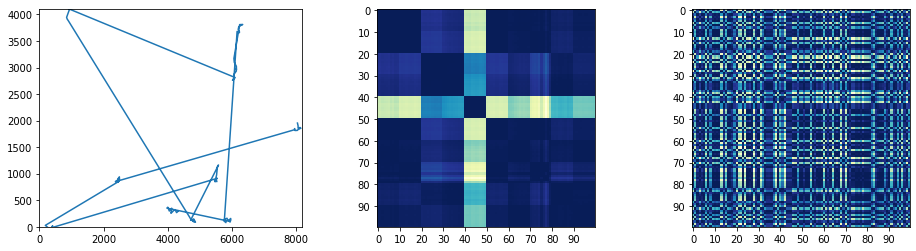

simulation: 9


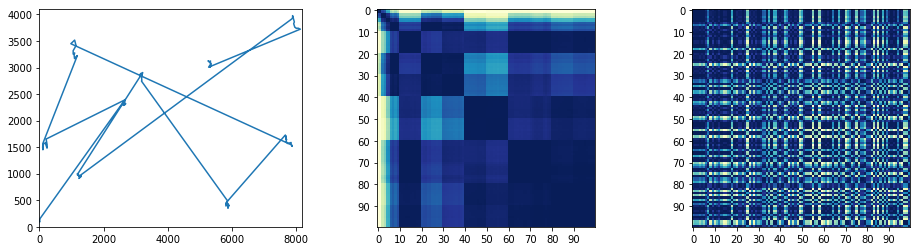

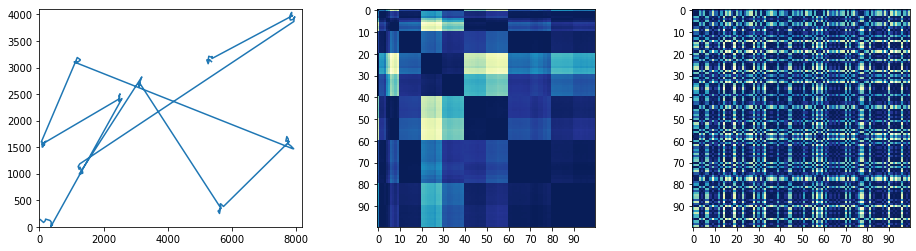

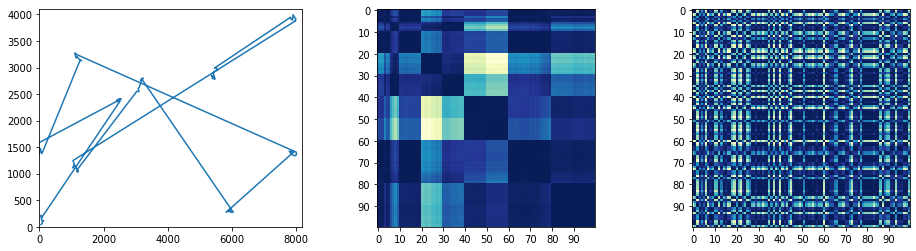

In [2]:
## Set parameters. 
n_simulations = 12 # number of simulations
sig = 2000         # fixation noise 
jump_sig = 5000    # jump noise
jump = 10          # jump interval
n_steps = 100      # number of timesteps 

sim_matrices = []

for s in np.arange(n_simulations): 
    
    gaze = np.ones((n_steps, 2))*np.nan
    
    ## Change jump locations every 3 simulations.  
    if np.mod(s,3)==0: 
   
        print('simulation: ' + str(s))
        
        ## Pre-determine jump locations.
        x, y = np.arange(0,8192)+1, np.arange(0,4096)+1
        x_jumps = np.array([random.choice(x) for i in np.arange(n_steps/jump)])
        y_jumps = np.array([random.choice(y) for i in np.arange(n_steps/jump)])
        
    ## Generate scanpath. 
    jump_count = 0
    for t in np.arange(n_steps): 

        if np.mod(t,jump)==0: 
            # Jump to new location.
            x_current, y_current = x_jumps[jump_count], y_jumps[jump_count]
            x_current, y_current = np.round(np.random.multivariate_normal([x_current, y_current],[[jump_sig, 0], [0, jump_sig]]))
            jump_count = jump_count + 1
        else: 
            # Fixate at current location. 
            [x_current, y_current] = np.round(np.random.multivariate_normal([x_current, y_current],[[sig, 0], [0, sig]]))

        gaze[t,:] = x_current, y_current

    time_sim = cosine_similarity(gaze, dense_output=True)
    sim_matrices.append(time_sim)

    fig, ax = plt.subplots(1, 3, figsize=(16,4))
    ax[0].plot(gaze[:,0], gaze[:,1])
    ax[0].set_xlim(0,8192)
    ax[0].set_ylim(0,4096)
    ax[1].imshow(time_sim, cmap='YlGnBu')
    ax[1].set_xticks(np.arange(0,n_steps, 10))
    ax[1].set_yticks(np.arange(0,n_steps, 10))
    p = np.random.permutation(n_steps)
    time_sim_permuted = sim_matrices[0][p,:][:,p]
    ax[2].imshow(time_sim_permuted, cmap='YlGnBu')
    ax[2].set_xticks(np.arange(0,n_steps, 10))
    ax[2].set_yticks(np.arange(0,n_steps, 10))
    plt.show();

#### Compute 2nd order representational dissimilarity matrix.

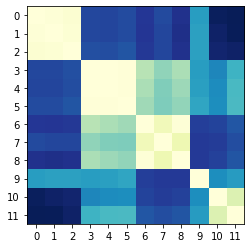

In [10]:
avg, rdm = visual_search_rsa.compute_average(sim_matrices, distance='pearson')

fig, ax = plt.subplots(1, 1, figsize=(16,4))
ax.imshow(rdm, cmap='YlGnBu')
ax.set_xticks(np.arange(0,n_simulations))
ax.set_yticks(np.arange(0,n_simulations));